In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-dark')

def get_rect_windows(mean,limit,x_vals,N=1000):  
  rect = np.zeros(N)
  for i in range(N):
    if(x_vals[i]>=(mean-(limit)) and x_vals[i]<=(mean+(limit))):
      rect[i] = 1
    else:
      rect[i] = 0
  
  return x_vals,rect

def get_delta(mean,x_vals,N=1000):  
  rect = np.zeros(N)
  for i in range(N):
    if(x_vals[i]<mean and x_vals[i+1]>mean):
      rect[i] = 1
    else:
      rect[i] = 0
  
  return x_vals,rect

In [ ]:
vp = [1.0001,0.9999,1.0020,1.0030,1.0001] #cuatro digitos y medio
vx = [1.010,1.009,1.008,1.010,1.009]      #tres digitos y medio

vpMed=np.mean(vp)
print("Vp media:",vp_media)
vxMed=np.mean(vx)
print("Vx media",vx_media)

# errorVx=1+2/1009*100
# errorVp=0.05+2/10010*100
errorVx=5
errorVp=0.1
desvio_vp=np.std(vp)
desvio_vx=np.std(vx)

ui_vx=desvio_vx/len(vp)
print("incertidumbre tipo A Vx: ",ui_vx)
ui_vp=desvio_vp/len(vx)
print("incertidumbre tipo A Vp: ",ui_vp)

# vx_j=(vx_media*e_vx)/np.sqrt(3)
# print("incertidumbre tipo B Vx: ",vx_j)
uj_vp=(vp_media*errorVp)/np.sqrt(3)
print("incertidumbre tipo B Vp: ",uj_vp)


cal=vx_media-vp_media
print("Calibracion =",cal)

uc_vx=np.sqrt(vx_i**2)
uc_vp=np.sqrt(vp_i**2+vp_j**2)

uCal=np.sqrt(uc_vx**2+uc_vp**2)
print(uCal)

Vp media: 1.00102
Vx media 1.0091999999999999
incertidumbre tipo A Vx:  0.00014966629547096016
incertidumbre tipo A Vp:  0.0002502478771138663
incertidumbre tipo B Vp:  0.057793916646419925
Calibracion = 0.008179999999999854
0.04044524553011914


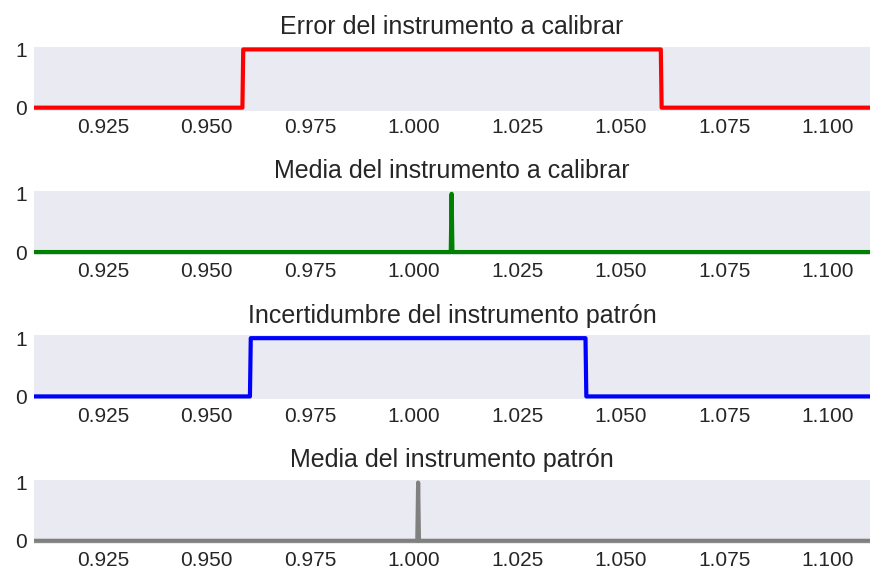

In [ ]:
#Tipo B tension
#Definicion de intervalo de tension
xlimits_v = [vxMed*(1-2*errorVx/100),vxMed*(1+2*errorVx/100)]
x_vals = samplesPoints_v = np.linspace(xlimits_v[0],xlimits_v[1],1000)

vx_x,vx_y = get_rect_windows(vxMed,vxMed*(errorVx/100),x_vals)
vp_x,vp_y = get_rect_windows(vpMed,uc_vp,x_vals)
vx_media_x, vx_media_y = get_delta(vxMed,x_vals)
vp_media_x, vp_media_y = get_delta(vpMed,x_vals)

plt.figure(dpi=150)
plt.subplot(4,1,1)
plt.plot(vx_x,vx_y, linewidth=2, color='r')
plt.title('Error del instrumento a calibrar')
plt.xlim(xlimits_v)
plt.subplot(4,1,2)
plt.plot(vx_media_x,vx_media_y, linewidth=2, color='g')
plt.title('Media del instrumento a calibrar')
plt.xlim(xlimits_v)
plt.subplot(4,1,3)
plt.plot(vp_x,vp_y, linewidth=2, color='b')
plt.title('Incertidumbre del instrumento patrón')
plt.xlim(xlimits_v)
plt.subplot(4,1,4)
plt.plot(vp_media_x,vp_media_y, linewidth=2, color='grey')
plt.title('Media del instrumento patrón')
plt.xlim(xlimits_v)
plt.tight_layout()

In [ ]:
cal = vxMed - vpMed

uc_cal = np.sqrt((1*uc_vx)**2  + (-1*uc_vp)**2)
Uc_cal = uc_cal*2 #95.45%

print("Calbracion = {0:.5f} +- {1:.5f}".format(cal,Uc_cal))

limSup = vxMed*(1 + errorVx/100)
limInf = vxMed*(1 - errorVx/100) 

if (limInf < (vxMed + cal) < limSup):
  print("Cumple la media")
else:
  if (limInf < (vxMed+cal+Uc_cal) < limSup ) or (limInf < (vxMed+cal-Uc_cal) < limSup ):
      print("No cumple la media, pero es marginal")
  else:
    print("No cumple de ninguna manera :(")

Calbracion = 0.00818 +- 0.08089
Cumple la media
